# Author & Context

This project was completed by **Anass El Basraoui** on **November 13, 2021**, as part of my early learning journey in data science.

At the time, this was my **first-ever project** in data analysis and data visualization. It was conducted during my academic training, and it represents the very beginning of my hands-on experience with Python, Excel datasets, and analytical thinking.

Although basic in structure, this project laid the foundation for the data-driven mindset I developed in the following years — and remains a key milestone in my transition toward professional data science.


## Introduction

The importance of data in business today is paramount. Data drives commercial strategy, marketing initiatives, and customer relationship management. Investing in data management solutions has become a necessity for many organizations. But how can one capitalize effectively on data that is imprecise, incomplete, or even inaccessible? The value of data depends primarily on its quality. Data quality lies at the heart of many organizational challenges. The qualification process must begin as early as the data ingestion stage. Clean, reliable data brings high added value — but to reach that point, it must go through several steps: identifying the need, collecting, cleaning, and ultimately visualizing it.

Data visualization is an essential tool in Data Science. It serves as the foundation for analysis, exploration, and informed decision-making. It helps transform raw information into readable and meaningful insights for a wider audience. Accessibility is a key concern here — data should not be reserved for specialists only.

In our case, data visualization will help us respond to a real business scenario: a multinational executive wants to analyze the behavior of their sales across different countries. To answer this, we will use the full dataset, visualize it, and extract key insights regarding global sales trends, the contribution of each country to overall revenue, and which products are driving the most profit or volume.

All of this will be achieved using Python and a range of statistical and data visualization tools.


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
from plotly.offline import plot

df= pd.read_excel("Global Superstore.xls",parse_dates=["Order_Date", "Ship_Date"]) # Rather that object, Order_Date and Ship_Date are transformed into a Date time


# Exploratory Data Analysis (EDA): Data Acquisition & Overview

In [29]:
df.columns= [i.strip() for i in df.columns] 
print(df.shape)
display(df.sample(5))

(51290, 23)


,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
49660,TU-2012-1690,2012-12-25,2012-12-31,Standard Class,ED-3885,Emily Ducich,Home Office,Uskudar,Istanbul,Turkey,...,OFF-STO-10003342,Office Supplies,Fasteners,"Stockwell Rubber Bands, Assorted Sizes",5.436,1,0.6,-1.374,0.430,Medium
13499,IN-2013-79530,2013-05-20,2013-05-24,Standard Class,AA-10645,Anna Andreadi,Consumer,Chennai,Tamil Nadu,India,...,OFF-ST-10003141,Office Supplies,Storage,"Fellowes Trays, Industrial",289.350,5,0.0,54.900,22.790,High
32733,MX-2011-128104,2011-09-28,2011-09-30,Second Class,DE-13255,Deanra Eno,Home Office,Guadalajara,Jalisco,Mexico,...,OFF-FA-10000467,Office Supplies,Fasteners,"Stockwell Push Pins, 12 Pack",36.800,4,0.0,11.760,4.372,Critical
7813,US-2011-149874,2011-06-10,2011-06-15,Second Class,JD-16015,Joy Daniels,Consumer,Santo Domingo,Santo Domingo,Dominican Republic,...,FUR-FU-10001657,Furniture,Furnishings,"Deflect-O Frame, Erganomic",325.980,9,0.5,-260.820,43.344,Medium
30076,ES-2014-4920624,2014-12-12,2014-12-16,Standard Class,AS-10285,Alejandro Savely,Corporate,Namur,Namur,Belgium,...,OFF-ST-10001091,Office Supplies,Storage,"Smead Box, Industrial",78.750,7,0.0,6.300,5.460,High


In [30]:
df.columns

Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID',
       'Customer_Name', 'Segment', 'City', 'State', 'Country', 'Postal Code',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order_ID        51290 non-null  object        
 1   Order_Date      51290 non-null  datetime64[ns]
 2   Ship_Date       51290 non-null  datetime64[ns]
 3   Ship_Mode       51290 non-null  object        
 4   Customer_ID     51290 non-null  object        
 5   Customer_Name   51290 non-null  object        
 6   Segment         51290 non-null  object        
 7   City            51290 non-null  object        
 8   State           51290 non-null  object        
 9   Country         51290 non-null  object        
 10  Postal Code     9994 non-null   float64       
 11  Market          51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15  Su

In [32]:
df.describe()

,Order_Date,Ship_Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375818
min,2011-01-01 00:00:00,2011-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,2014-12-31 00:00:00,2015-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,NaN,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296810


In [14]:
df.nunique() 

Order_ID          25035
Order_Date         1430
Ship_Date          1464
Ship_Mode             4
Customer_ID        1590
Customer_Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             27200
Quantity             14
Discount             29
Profit            28234
Shipping Cost     17095
Order Priority        4
dtype: int64

In [16]:
print((df["Sub-Category"].nunique()))
print((df["Category"].nunique()))
print((df["Country"].nunique()))
print((df["Region"].nunique()))
print((df["Customer_Name"].nunique()))

17
3
147
13
795


After importing the dataset with Pandas, we begin by exploring its structure.

The dataset contains **51,290 rows** and **23 columns**, including 5 **quantitative variables**:
`['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']`.

Below is a brief description of the columns:

| Variable         | Description                                 |
|------------------|---------------------------------------------|
| `Order_ID`       | Unique order identifier                     |
| `Order_Date`     | Order placement date                        |
| `Ship_Date`      | Shipping date                               |
| `Ship_Mode`      | Shipping method                             |
| `Customer_ID`    | Unique customer ID                          |
| `Customer_Name`  | Customer's full name                        |
| `Segment`        | Customer segment                            |
| `City`           | City where the sale occurred                |
| `State`          | State or region of the sale                 |
| `Country`        | Country of the sale                         |
| `Postal Code`    | Postal/ZIP code                             |
| `Market`         | Market type                                 |
| `Region`         | Global region                               |
| `Product ID`     | Unique product identifier                   |
| `Category`       | Product category                            |
| `Sub-Category`   | Product sub-category                        |
| `Product Name`   | Full product name                           |
| `Sales`          | Sale price (revenue per order)              |
| `Quantity`       | Quantity sold                               |
| `Discount`       | Discount applied                            |
| `Profit`         | Profit generated from the sale              |
| `Shipping Cost`  | Cost of shipping                            |
| `Order Priority` | Priority level of the order                 |

---

From this initial exploration, we can conclude that some columns — such as `Order_ID`, `Customer_ID`, `Postal Code`, or `Product ID` — are **not relevant for visualization purposes**, even though they may be useful in other analytical contexts (e.g., forecasting, logistics, CRM).

Regarding the **date ranges**:
- `Order_Date` ranges from **2011 to 2014**
- `Ship_Date` ranges from **2011 to 2015**

We also observe that the dataset covers **795 unique customers** across **147 countries**, grouped into **13 global regions** such as:
`['East', 'Oceania', 'Central', 'Africa', 'West', 'South', 'Central Asia', 'EMEA', 'North Asia', 'North', 'Caribbean', 'Southeast Asia', 'Canada']`.

This initial inspection prepares us for deeper transformations and visualizations in the next steps.


We can see that there was 451 orders from Morocco, including 129 from Casablanca, the price of purchases is 29798, which allowed a profit of 6872.

In [90]:
orders_mar = (df.Country=='Morocco').sum()
orders_casa = ((df['Country']=='Morocco') & (df['City']=='Casablanca')).sum() # Good practice to avoid the problem if the same city name but different coutries

print(f"{orders_mar} orders originating from Morocco (2011-2014)")
print(f"{orders_casa} orders originating from Casablanca (Morocco)")
print(f'Orders from Casablanca cost {sum(df[(df["Country"]=="Morocco") & (df["City"]=="Casablanca")]["Sales"])}')
print(f'Orders from Casablanca generate {sum(df[(df["Country"]=="Morocco") & (df["City"]=="Casablanca")]["Profit"])} as profit')

451 orders originating from Morocco (2011-2014)
129 orders originating from Casablanca (Morocco)
Orders from Casablanca cost 29797.76999999999
Orders from Casablanca generate 6872.399999999999 as profit


## 3. Data Transformation and Filtering

During the exploratory phase, we identified several columns that do not contribute meaningful information for the purpose of data visualization.

For instance, columns such as:

- `Order_ID`
- `Customer_ID`
- `Customer_Name`
- `Postal Code`
- `Product ID`

...may be useful in other contexts (e.g., logistics, CRM, unique identification), but they are **not relevant** in a visualization-focused analysis. Therefore, these columns will be removed from the dataset to streamline our analysis and reduce noise.

In [91]:
df.drop(["Order_ID","Customer_ID","Postal Code","Product ID"],inplace=True,axis=1)
df.head()

,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,2012-07-31,2012-07-31,Same Day,Rick Hansen,Consumer,New York City,New York,United States,US,East,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,2013-02-05,2013-02-07,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,2013-10-17,2013-10-18,First Class,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,2013-01-28,2013-01-30,First Class,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,2013-11-05,2013-11-06,Same Day,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
df.isna().sum() 

Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [820]:
df.duplicated().sum()

0

# Les Ventes et le CA


## Evolution du CA

In [821]:
df['year'] = df['Order_Date'].dt.year
df['month'] = df['Order_Date'].dt.month
df['day'] = df['Order_Date'].dt.day

df.head()

,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,City,State,Country,Market,Region,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,year,month,day
0,2012-07-31,2012-07-31,Same Day,Rick Hansen,Consumer,New York City,New York,United States,US,East,...,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012,7,31
1,2013-02-05,2013-02-07,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,...,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013,2,5
2,2013-10-17,2013-10-18,First Class,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,...,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013,10,17
3,2013-01-28,2013-01-30,First Class,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,...,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013,1,28
4,2013-11-05,2013-11-06,Same Day,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,...,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2013,11,5


Text(0.5, 1.0, "L'evolution des ventes par années")

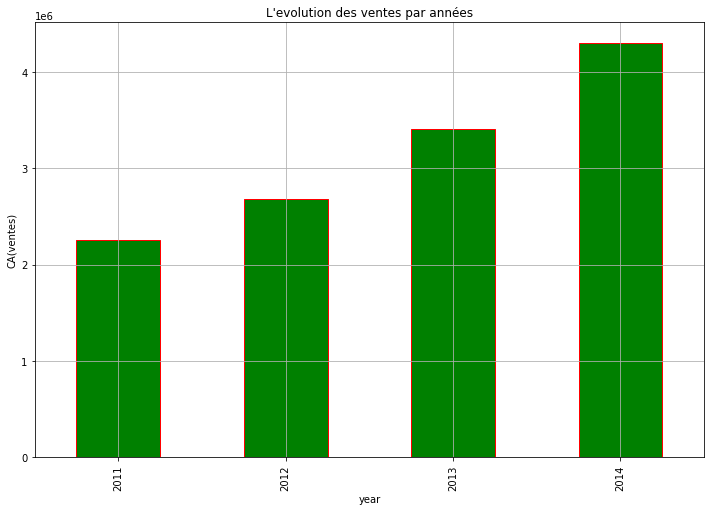

In [822]:
plt.figure(figsize=(12,8))
df.groupby(["year"])["Sales"].sum().plot.bar(color="g",edgecolor="r")
plt.ylabel("CA(ventes)")
plt.grid(True)
plt.title("L'evolution des ventes par années")

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



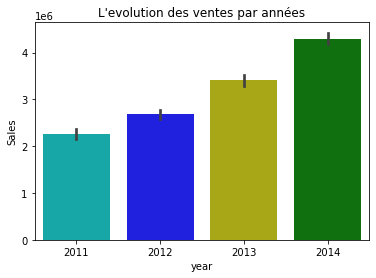

In [823]:
sns.barplot('year','Sales',data=df,estimator=sum,palette=['c','b','y','g'])
plt.title("L'evolution des ventes par années")
plt.show()

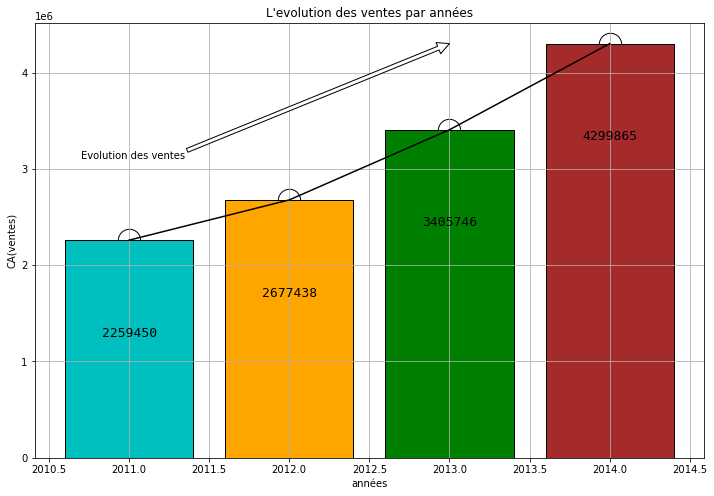

In [870]:
plt.figure(figsize=(12,8))
x=[i for i in range(2011,2015)]
y=list(df.groupby(["year"])["Sales"].sum())
plt.scatter(x,y,c='w',edgecolor="black",marker='o',s=500)#marker=P X H D s ...
plt.plot(x,y,c='black')
plt.bar(x,y,color=['c','orange','g','brown'],edgecolor="black")

plt.annotate("Evolution des ventes",xy=(2013,4300000),xytext=(2010.7,3100000),arrowprops={'facecolor':'w','shrink':100000})


for i in range(len(x)):
    plt.text(x[i],y[i]-1000000,str(int(y[i])),fontfamily='monospace',fontsize=13,horizontalalignment='center')

plt.xlabel("années")
plt.ylabel("CA(ventes)")
plt.title("L'evolution des ventes par années")
plt.grid(True)
plt.show()


In [825]:
fig=px.treemap(df,path=["Country"],values='Sales')
plot(fig)

C:\Users\Lenovo\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



'temp-plot.html'

In [826]:
df[(df["Country"]=="United States")]["Sales"].sum()/df["Sales"].sum()

0.18170460852410536

In [827]:
df[(df["Country"]=="United States") | (df["Country"]=="France")|(df["Country"]=="Australia")|(df["Country"]=="China")|(df["Country"]=="Germany")]["Sales"].sum()/df["Sales"].sum()

0.4279825220015614

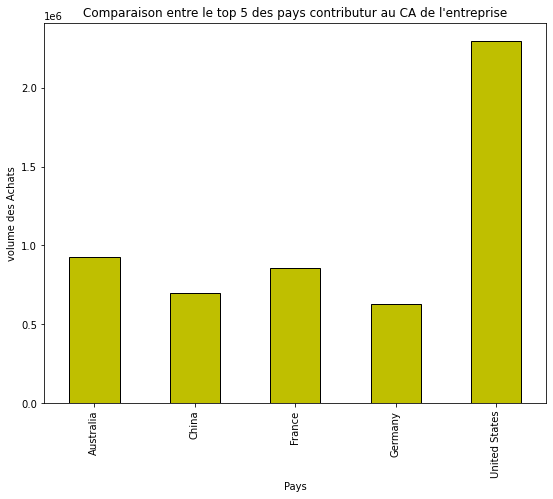

In [828]:
plt.figure(figsize=(9,7))
plt.title("Comparaison entre le top 5 des pays contributur au CA de l'entreprise")
df1=df[(df["Country"]=="United States") | (df["Country"]=="France")|(df["Country"]=="Australia")|(df["Country"]=="China")|(df["Country"]=="Germany")]
df1.groupby(["Country"])["Sales"].sum().plot.bar(color='y',edgecolor="black")
plt.xlabel("Pays")
plt.ylabel("volume des Achats")
plt.show()

In [829]:
plt.figure(figsize=(12,8))
a=((df.groupby(["Country"]).sum()["Sales"]/df["Sales"].sum())*100)


<Figure size 864x576 with 0 Axes>

In [830]:
a=df.groupby(["Country"]).sum()
b=a[a["Sales"]>100000]["Sales"]/df["Sales"].sum()*100

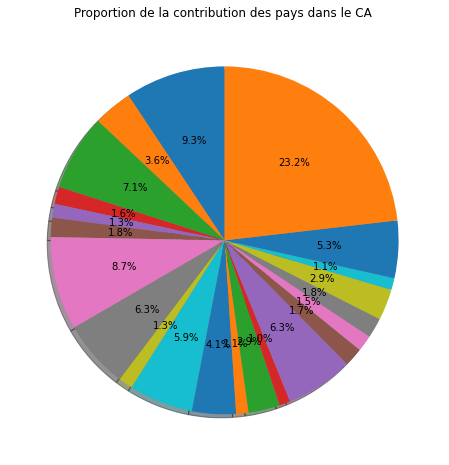

In [831]:
plt.figure(figsize=(12,8))
plt.pie(b, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Proportion de la contribution des pays dans le CA ")
plt.show()

In [832]:
fig=px.treemap(df,path=["year","Country"],values='Sales')
plot(fig)

C:\Users\Lenovo\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Lenovo\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



'temp-plot.html'

In [833]:
fig=px.treemap(df,path=["Market","Region","Country","City"],values='Sales')
plot(fig)

C:\Users\Lenovo\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Lenovo\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Lenovo\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Lenovo\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



'temp-plot.html'

In [834]:
fig=px.treemap(df,path=["Region","Market","Country"],values="Sales")
plot(fig)

C:\Users\Lenovo\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Lenovo\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Lenovo\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



'temp-plot.html'

# Profit


# Evolution du profit par années : 

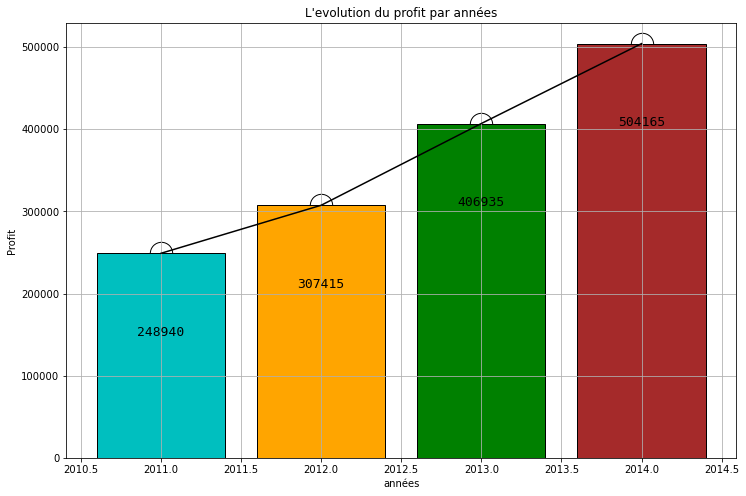

In [835]:
plt.figure(figsize=(12,8))
x=[i for i in range(2011,2015)]
y=list(df.groupby(["year"])["Profit"].sum())
plt.scatter(x,y,c='w',edgecolor="black",marker='o',s=500)#marker=P X H D s ...
plt.plot(x,y,c='black')
plt.bar(x,y,color=['c','orange','g','brown'],edgecolor="black")

for i in range(len(x)):
    plt.text(x[i],y[i]-100000,str(int(y[i])),fontfamily='monospace',fontsize=13,horizontalalignment='center')

plt.xlabel("années")
plt.ylabel("Profit")
plt.title("L'evolution du profit par années")
plt.grid(True)
plt.show()

In [836]:
y=df.groupby(["year"]df)["Profit"].sum()


SyntaxError: invalid syntax (1007860975.py, line 1)

In [ ]:
df["Profit"].sum()/df["Sales"].sum()

# Les pays les plus contributeur au CA de l’entreprise :
En général (Indépendamment du temps) :


In [843]:
fig=px.treemap(df,path=["Country"],values='Profit')
plot(fig)

C:\Users\Lenovo\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



'temp-plot.html'

In [842]:
df[(df["Country"]=="United States") | (df["Country"]=="France")|(df["Country"]=="India")|(df["Country"]=="China")|(df["Country"]=="United Kingdom")]["Profit"].sum()/df["Profit"].sum()

0.5363570710895871

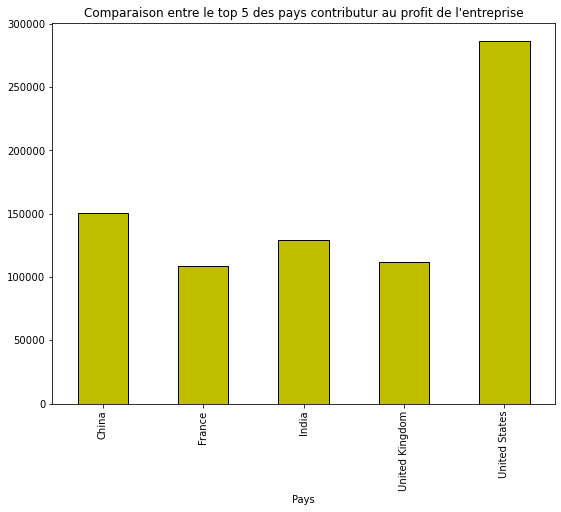

In [841]:
plt.figure(figsize=(9,7))
plt.title("Comparaison entre le top 5 des pays contributur au profit de l'entreprise")
df1=df[(df["Country"]=="United States") | (df["Country"]=="France")|(df["Country"]=="India")|(df["Country"]=="China")|(df["Country"]=="United Kingdom")]
df1.groupby(["Country"])["Profit"].sum().plot.bar(color='y',edgecolor="black")
plt.xlabel("Pays")
plt.ylabel("")
plt.show()

In [840]:
df[(df["Country"]=="United States") | (df["Country"]=="France")|(df["Country"]=="India")|(df["Country"]=="China")|(df["Country"]=="United Kingdom")]["Profit"].sum()/df["Profit"].sum()

0.5363570710895871

In [839]:
df[(df["Country"]=="United States")]["Profit"].sum()/df["Profit"].sum()

0.19516549026799146

In [838]:
a=df.groupby(["Country"]).sum()
b=a[a["Profit"]>25000]["Profit"]/df["Profit"].sum()*100

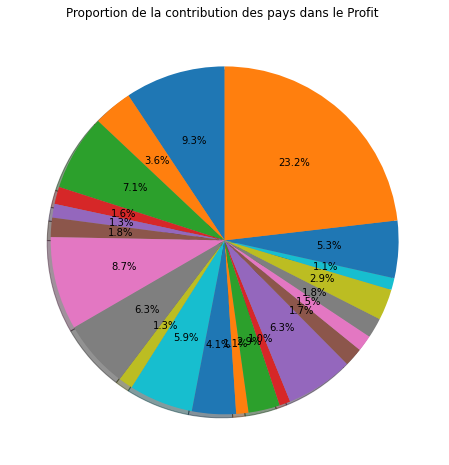

In [837]:
plt.figure(figsize=(12,8))
plt.pie(b, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Proportion de la contribution des pays dans le Profit ")
plt.show()

# Relation profit et CA

<AxesSubplot:>

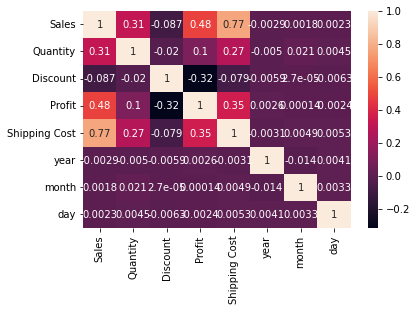

In [853]:
c=df.corr()
sns.heatmap(c,annot=True)

In [854]:
c=df["Sales"].corr(df["Profit"])
c

0.4849181126194448

In [857]:
c=df.groupby(["year"])["Sales"].sum().corr(df.groupby(["year"])["Profit"].sum())
c

0.9981053840984879

# Contribution des produits au CA :

In [859]:
a=df.groupby(["Category","Sub-Category"]).sum()["Sales"]
b=df.groupby(["Category"]).sum()["Sales"]
d=df["Sales"].sum()

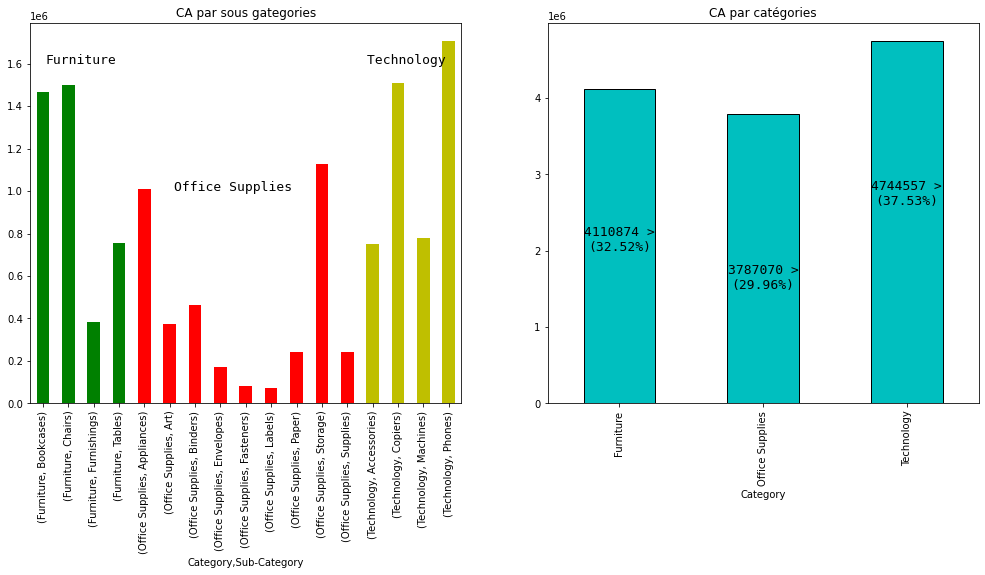

In [860]:
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
a.plot.bar(color=["g"]*4+["r"]*9+["y"]*4)
plt.title("CA par sous gategories")
plt.text(1.5,1600000,"Furniture",fontfamily='monospace',fontsize=13,horizontalalignment='center')
plt.text(7.5,1000000,"Office Supplies",fontfamily='monospace',fontsize=13,horizontalalignment='center')
plt.text(14.5,1600000,"Technology ",fontfamily='monospace',fontsize=13,horizontalalignment='center')


plt.subplot(1,2,2)

b.plot.bar(color="c",edgecolor="black")
plt.text(0,2000000,f"4110874 >\n({round(4110874/d*100,2)}%)",fontfamily='monospace',fontsize=13,horizontalalignment='center')
plt.text(1,1500000,f"3787070 >\n({round(3787070/d*100,2)}%)",fontfamily='monospace',fontsize=13,horizontalalignment='center')
plt.text(2,2600000,f"4744557 >\n({round(4744557/d*100,2)}%)",fontfamily='monospace',fontsize=13,horizontalalignment='center')
plt.title("CA par catégories")
plt.show()

In [861]:
a=df.groupby(["Product Name"]).sum()["Sales"]
a[a==a.max()]


Product Name
Apple Smart Phone, Full Size    86935.7786
Name: Sales, dtype: float64

In [862]:
len(df["Product Name"].unique())

3788

In [863]:
fig=px.treemap(df,path=["Sub-Category"],values='Sales')
plot(fig)

C:\Users\Lenovo\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



'temp-plot.html'

# Contribution des produits au Profit :

In [864]:
a=df.groupby(["Category","Sub-Category"]).sum()["Profit"]
b=df.groupby(["Category"]).sum()["Profit"]
d=df["Profit"].sum()

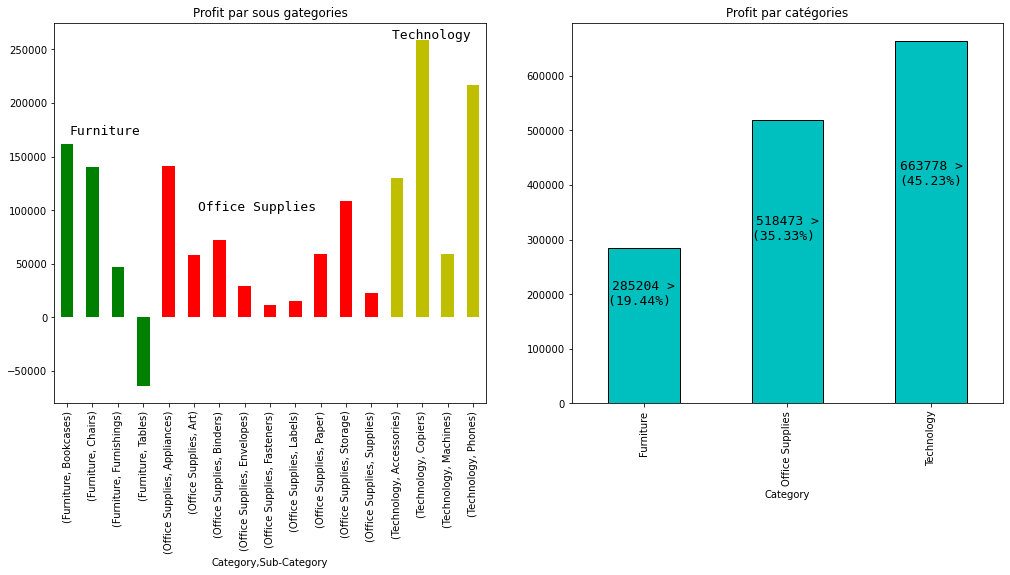

In [865]:
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
a.plot.bar(color=["g"]*4+["r"]*9+["y"]*4)
plt.title("Profit par sous gategories")
plt.text(1.5,170000,"Furniture",fontfamily='monospace',fontsize=13,horizontalalignment='center')
plt.text(7.5,100000,"Office Supplies",fontfamily='monospace',fontsize=13,horizontalalignment='center')
plt.text(14.5,260000,"Technology ",fontfamily='monospace',fontsize=13,horizontalalignment='center')


plt.subplot(1,2,2)

b.plot.bar(color="c",edgecolor="black")
plt.text(0,180000,f"285204 >\n({round(285204/d*100,2)}%) ",fontfamily='monospace',fontsize=13,horizontalalignment='center')
plt.text(1,300000,f"518473 >\n({round(518473/d*100,2)}%) ",fontfamily='monospace',fontsize=13,horizontalalignment='center')
plt.text(2,400000,f"663778 >\n({round(663778/d*100,2)}%)",fontfamily='monospace',fontsize=13,horizontalalignment='center')
plt.title("Profit par catégories")
plt.show()

In [866]:
a=df.groupby(["Product Name"]).sum()["Profit"]
a[a==a.max()]

Product Name
Canon imageCLASS 2200 Advanced Copier    25199.928
Name: Profit, dtype: float64

In [867]:
fig=px.treemap(df,path=["Sub-Category"],values='Sales')
plot(fig)

C:\Users\Lenovo\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



'temp-plot.html'